# MEMORY TFM

# Estructura del TFM
- 1) Requerimientos Tecnicos
- 2) Carga de la Base de Datos
- 3) Informacion sobre la Base de Datos
- 4) Objetivo
- 5) Datos: Extracción
- 6) Cleanning & Merging
- 7) Análisis EDA
- 8) Feature Importances
- 9) Preprocessing
- 10) Modelo
- 11) Interpretación de los resultados
- 12) Conclusión

## 1) Requerimientos Tecnicos




Para ejecutar el codigo es necesario tener instalado Python version 2.7 o 3.6 asi como distintos paquetes o librerias. Se recomienda tener instalada la Suite Anaconda donde se entrontraran preinstalados la mayoria de los paquetes y librerias que son necesarios.

## 2) Carga de la Base de Datos


## 3) Informacion sobre la Base de Datos

Para nuestro modelo hemos obtenido una base de datos de una entidad financiera con 450.000 clientes con informacion y  productos de cada uno de estos. Desde si el saldo que tiene en cuenta , fondo de inversion o plan de pension,  el recorrido comercial del cliente a ojos de la entidad financiera, si esta o no carteriazo o si tiene o no tiene productos como seguros, nominas, tarjetas o recibos domiciliados.

    


La informacion detallada del data set se encuentra dentro de una de las carpetas de este repositorio con el nombre de Data-Codes

[PONER EL ENLACE A lOS DATA CODES]


## 4) Objetivo

Nuestro Objetivo es construir un modelo de clasificacion con el fin de identificar si un cliente de la entidad es susceptible de contratar o no un Seguro de hogar.  Utilizaremos distintos modelos de clasificacion que seran finalmente comparados para quedarnos con uno.


## 5) Datos: Extracción


La estracción de los datos se ha realizado desde un sistema de informacion de gestion de una entidad financiera. Sistema de informacion que guarda millones de datos de cualquier tipo financiero.

Se han ido descargando archivos tipo excel relacionados con distintos epigrafes tales como saldos en cuenta, saldos en fondos de inversion o planes de pension, lineas de producto, seguros, tipo de segmentacion, todos ellos titularidad de 450.000 clientes.

Estos clientes se han distribuido y diferenciado en 11 Direcciones de Zona distintas, 9 archivos por cada una de estas Direcciones de Zona. 

Todos los archivos han sido anonimizados. Numero de identificador de cliente ha sido cambiado por una secuencia desde 1 a 450.000. Numeros y codigos de las Direcciones de Zona han sido cambiados por una secuencia del 1 al 11. Por ultimo se han eliminado nombres y direcciones.

 [PONER EL ENLACE A LA IMAGEN ]
 
 

## 6) Cleanning & Merging



__Merge__. 11 Carpetas con 11 Direcciones de Zona y 9 archivos excel cada uno se funsionan en un solo Data Frame. Total 99 archivos excel individuales 

 [PONER EL ENLACE AL NOTEBOOK]

__Cleanning__. Realizamos un primer prepocesado de los datos generados con merge trabajando de inicio los valores Nans. Se han estudiado, detectado y rellenado  con distintos valores acordes a la categoria y segmento del dato.. Herramientas como Outliers, Escalado, Encoder o PCA se han utilizado directamente en los propios modelos como precuela al estudio del modelo

 [PONER EL ENLACE AL NOTEBOOK]

## 7) Análisis EDA


Comenzamos el analisis de nuestra base de datos analizando por primera vez el Data Frame . Nuestro objetivo es realizar un analisis exploratorio, estudiando los datos,  buscando posibles patrones, visualizando datos estadisticos como Minimo - Maximo - Medias - Desviaciones estandar...y encontrando posibles relaciones que nos seran utililes para entender el contexto del data Frame y posteriormente para nuestro modelo de Machine Learning.



Con este analisis esperamos obtener informacion basica de todo el Data Frame e informacion mas profunda de la variable objetivo  __Target Seguro de Hogar__

Iremos cargando las librerias que vamos a usar para nuestro modelo segun las vayamos necesitando. 

In [1]:
# Librería que permite trabajar con datos estructurados en filas y columnas
import pandas as pd

In [2]:
#Leemos la base de datos y asociamos a la variable df el data set
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/Financial-Product-Sales-Forecast-Model/0rigin_data/cleanned_data/df.tfm')

In [3]:
# Generamos una muestra aleatoria. Sacamos por pantalla 5 filas mediante la funcion sample.
# De esta forma visualizamos la estructura.
df.sample(5)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
236818,236819,9151.94,SI,NO,ASESOR FINANCIERO,14642.0,TUTELA,27735.0,SI,CONSULTIVO,...,45.0,BAJO,MEDIO RECORRIDO,1,115,0,0,0,0,0
162046,162047,108339.27,SI,NO,ASESOR FINANCIERO,41319.0,ASESORAMIENTO FINANCIERO,15954.0,SI,CONSULTIVO,...,57.0,ALTO,ALTO RECORRIDO,3,322,0,0,0,0,1
244196,244197,582.52,SI,NO,ASESOR FINANCIERO,15942.0,ASESORAMIENTO FINANCIERO,14743.0,SI,TRANSACCIONAL,...,47.0,ALTO,ALTO RECORRIDO,8,813,0,0,0,0,0
41604,41605,38859.62,SI,NO,ASESOR FINANCIERO,31035.0,TUTELA,39691.0,NO,SIN USO,...,84.0,ALTO,BAJO RECORRIDO,11,1114,0,0,0,0,0
136679,136680,95907.84,SI,NO,ASESOR FINANCIERO,33916.0,ASESORAMIENTO FINANCIERO,16502.0,SI,TRANSACCIONAL,...,60.0,ALTO,BAJO RECORRIDO,2,217,1,0,0,0,0


In [4]:
# Imprimimos Dimension y Forma del Data Frame. 
# La base de datos consta de 451.374 filas, 30 columnas / Features y 13.5mm de datos. 
print('Filas = ', df.shape[0])
print('Columnas = ', df.shape[1])
print('Datos = ',df.size)

Filas =  451374
Columnas =  30
Datos =  13541220


In [5]:
# Identificamos el Nombre de las Columnas 
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

### Informacion de las columnas - existencia de nulos y tipos de datos.  Comprobamos que el DF no tiene NANs y que los tipos de datos son los siguientes:

- float64 (7 variables)
- int64    (13 variables)
- object (10 variables)
    

In [6]:
# El método info muestra un resumen de nuestro dataframe.
# Incluye información sobre el tipo de los índices de filas, columnas y los valores no nulos. 
# dtypes - int64(13), object(10), float64(7)
# Finalmente nos oferce informacion de la memoria usada:103.3+ MB
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451374 entries, 0 to 451373
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   cliente             451374 non-null  int64  
 1   saldo_captacion     451374 non-null  float64
 2   esta_carterizado    451374 non-null  object 
 3   cliente_bbp         451374 non-null  object 
 4   tipo_gestor         451374 non-null  object 
 5   gestor              451374 non-null  float64
 6   cartera_patron      451374 non-null  object 
 7   codigo_cartera      451374 non-null  float64
 8   digital_3_meses     451374 non-null  object 
 9   camino_digital      451374 non-null  object 
 10  saldo_financiacion  451374 non-null  float64
 11  saldo_ffii          451374 non-null  float64
 12  saldo_plp           451374 non-null  float64
 13  lp_dom_ingresos     451374 non-null  int64  
 14  lp_tjta_cto         451374 non-null  int64  
 15  lp_tjt_rev          451374 non-nul

### El DF esta formado por 30 variables distintas las cuales vamos a segmentar y distinguir por bloques de cara a un mejor estudio.

- Bloque 1 - Variables unidades de negocio 5 
- Bloque 2 - Variables Edad 1 
- Bloque 3 - Variables de Ahorro - Financiación 4 
- Bloque 4 - Variables de Servicios 5 
- Bloque 5 - Variables de Seguros 5
- Bloque 6 - Variables Categoricas de Segmentacion 10 


In [7]:
# Unificamos variables por bloques
variables_edad = df['edad']
variables_unidad_negocio = df[['cliente','gestor','codigo_cartera','oficina','dz']]
variables_ahorro_financiacion = df[['saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp']]
variables_servicio = df[['lp_dom_ingresos','lp_tjta_cto','lp_tjt_rev','lp_rbos','lp_of_int']]
variables_seguros = df[['lp_seg_vida','lp_seg_acc','lp_seg_salud','lp_seg_auto','lp_seg_hogar']]
variables_segmentacion = df[['esta_carterizado','cliente_bbp','tipo_gestor','cartera_patron',
                            'digital_3_meses','camino_digital','marca_bp','marca_ccte',
                            'seg_valor','seg_recorrido']]

### __Estudiamos las variables por  Bloques, mediante visualizacion por histrogramas y descripcion estadistica.__ 



### Bloque 1  CONTEXTO Variables unidades de Negocio  

In [8]:
# Cargamos Libreria Visualizacion
import matplotlib.pyplot as plt

In [9]:
#  **** MAPA CONTEXTUAL **** Informacion Unidades de Negocio.
print('INFORMACION VARIABLES UNIDADES DE NEGOCIO')
print('-----------------------------------------')  
print('Numero Clientes: ', df['cliente'].nunique())
print('Numero DZs:      ',df['dz'].nunique())
print('Numero Oficinas: ', df['oficina'].nunique())
print('Numero Gestores: ', df['gestor'].nunique())


INFORMACION VARIABLES UNIDADES DE NEGOCIO
-----------------------------------------
Numero Clientes:  451374
Numero DZs:       11
Numero Oficinas:  162
Numero Gestores:  458


Numero de Oficinas por DZ 
dz
1     15
2     13
3     17
4     16
5     17
6     15
7     13
8     11
9     16
10    15
11    14
Name: oficina, dtype: int64


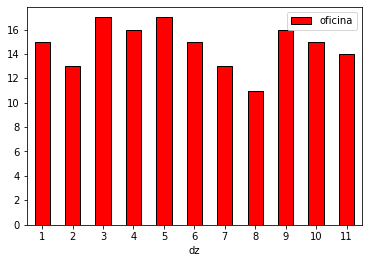

In [10]:
# Numero oficinas por cada Direccion de Zona
print('Numero de Oficinas por DZ ')
print(df.groupby('dz')['oficina'].nunique())
df.groupby('dz')['oficina'].nunique().plot(kind = 'bar', legend = 'Reverse', grid = False, color = 'r', 
                                           rot = True, edgecolor = 'black',  linewidth=1)
plt.show()

Numero de Clientes por DZ 
dz
1     45534
2     35406
3     48081
4     38749
5     51468
6     42198
7     37926
8     21690
9     40227
10    42360
11    47735
Name: cliente, dtype: int64


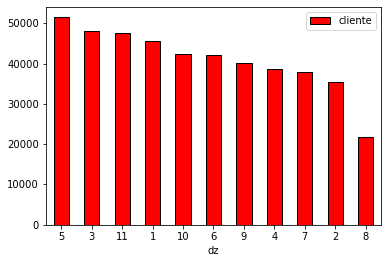

In [11]:
# Numero Clientes por cada Direccion de Zona
print('Numero de Clientes por DZ ')
print(df.groupby('dz')['cliente'].nunique())
numero_clientes_por_dz = df.groupby('dz')['cliente'].nunique().sort_values(ascending = False)
numero_clientes_por_dz.plot(kind = 'bar',
                            legend = 'Reverse', 
                            grid = False, 
                            color = 'r',
                            rot = True,
                            edgecolor = 'black',
                            linewidth=1)
plt.show()

In [12]:
# Numero Clientes por oficina
# Informacion estadistica de los clientes por oficinas
df.groupby('oficina')['cliente'].nunique().describe()

count     162.000000
mean     2786.259259
std      1025.420335
min      1185.000000
25%      2000.500000
50%      2619.500000
75%      3357.000000
max      5755.000000
Name: cliente, dtype: float64

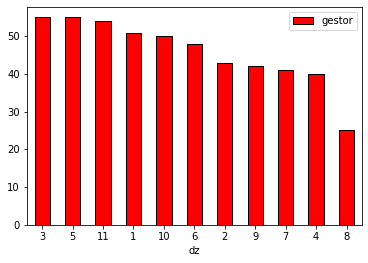

count    11.000000
mean     45.818182
std       8.931049
min      25.000000
25%      41.500000
50%      48.000000
75%      52.500000
max      55.000000
Name: gestor, dtype: float64

In [13]:
# Numero de gestores por DZ
numero_gestores_por_dz = df.groupby('dz')['gestor'].nunique().sort_values(ascending = False)
numero_gestores_por_dz.plot(kind = 'bar', 
                            legend = 'Reverse', 
                            grid = False, 
                            color = 'r', 
                            rot = True,
                            edgecolor = 'black', 
                            linewidth=1)
plt.show()
df.groupby('dz')['gestor'].nunique().describe()


Conclusiones.

******************__poner conclusiones__******************



### Bloque 2  Variable Edad 

count    451374.000000
mean         58.268941
std          19.018368
min           0.000000
25%          45.000000
50%          60.000000
75%          73.000000
max         118.000000
Name: edad, dtype: float64

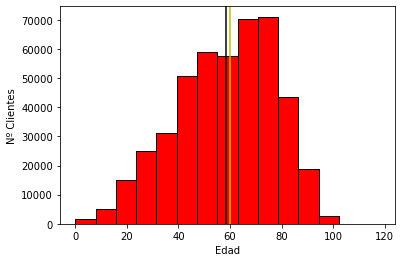

In [14]:
# Graficamos y representamos la distribucion de la Variable edad mediante un histograma.
# Mediante la funcion describe listamos sus principales estadisticas descriptivas.
# Distribucion normal sesgada hacia la derecha.
#
variables_edad.hist(color = 'r', bins = 15, grid = False, edgecolor = 'black',  linewidth = 1);
plt.axvline(variables_edad.mean(), color='black')
plt.axvline(variables_edad.median(), color='y')
plt.xlabel('Edad')
plt.ylabel('Nº Clientes')
variables_edad.describe()

In [15]:
# Generamos una nueva variable de segmentacion de clientes por edades para ver los tramos de edad.
# Esta segmentacion sirve tomar la decision de eliminar de nuestro modelo a clientes de ciertos rangos.
# Clientes entre 0 y 20 años y mas de 90 años no es comun que dispongan de un seguro de hogar.
#df['segmentacion_por_edad'] = pd.cut(df.edad, bins = [0,10,20,30,40,50,60,70,80,90,100,110],
#                     labels= ['0-10','10-20','20-30','30-40','40,50','50-60',
 #                             '60-70','70-80','80-90','90-100','100-110'])

df['segmentacion_por_edad'] = pd.cut(df.edad, bins = [0,18,25,50,90,110],
                     labels= ['0-18','18-25','25-50','50-90','90-110'])

df['cliente'].groupby(df['segmentacion_por_edad']).count().sort_values(ascending = False)

segmentacion_por_edad
50-90     292895
25-50     121987
18-25      16805
0-18       10856
90-110      8808
Name: cliente, dtype: int64

__Conclusiones__

- De cara a nuestro modelo eliminaremos a los clientes entre los rangos de edad 0-25 y 90 y superiores.
- La realidad a la hora de contratar un seguro de hogar es que menores de edad y jovenes hasta los 25 años no contratan ya que sencillamente no disponen de vivienda propia.  
- En cuanto a los clientes de mas de 90 años normalmente son los hijos quienes se hacer responsables de los seguros de hogar por lo que vamos a eliminarlos del modelo.

### Bloque 3  Variables Ahorro - Financiacion

,saldo_captacion,saldo_financiacion,saldo_ffii,saldo_plp
count,4.513740e+05,4.513740e+05,4.513740e+05,451374.000000
mean,4.971455e+04,1.380668e+04,8.483663e+03,1728.478326
std,8.792364e+04,4.296438e+04,3.844671e+04,10780.622435
min,-5.104332e+04,-4.900000e+03,0.000000e+00,0.000000
25%,1.813182e+03,0.000000e+00,0.000000e+00,0.000000
50%,1.520828e+04,0.000000e+00,0.000000e+00,0.000000
75%,6.446964e+04,6.841775e+02,0.000000e+00,0.000000
max,5.290216e+06,2.896317e+06,3.130940e+06,459937.460000


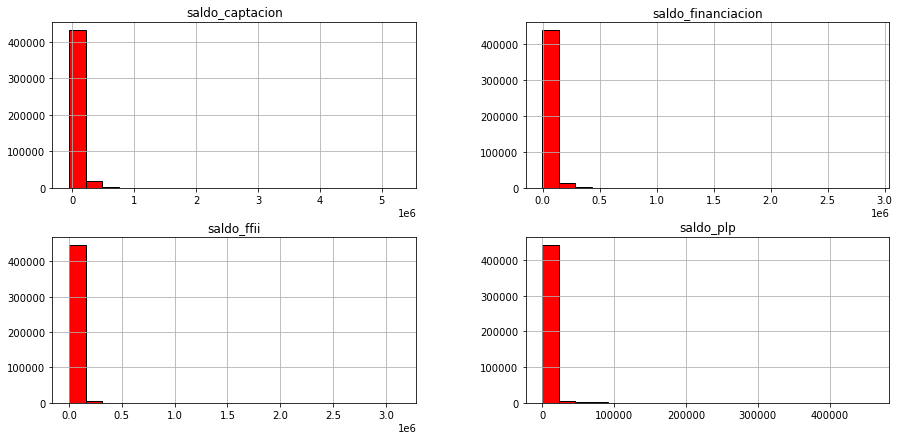

In [16]:
# Variables Ahorro Financiacion 'saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp'.
# Se observa como la mayoria de los clientes tienen poco saldo en cada una de las variables de ahorro.
# Hay concentracion de clientes con saldos bajos o igual a cero.
# En el modelo estas variables seran estudiadas para una posible transformacion.
variables_ahorro_financiacion.hist(figsize = (15,7), color = 'r', bins = 20, edgecolor = 'black', linewidth=1);
variables_ahorro_financiacion.describe()

In [17]:
print('Numero Total Clientes: ', df['cliente'].count())
print('Nº Clientes sin Fondos Inv: ', df[df['saldo_ffii'] == 0]['cliente'].count())
print('Nº Clientes sin Planes Pension:', df[df['saldo_plp'] == 0]['cliente'].count())
print('Nº Clientes con Financiacion:',df[df['saldo_financiacion'] > 1]['cliente'].count())

Numero Total Clientes:  451374
Nº Clientes sin Fondos Inv:  390442
Nº Clientes sin Planes Pension: 404808
Nº Clientes con Financiacion: 223894


__Conclusiones.__

- En una primera visualizacion con los histogramas,  ya detectamos que en los epigrafes de ffii, plp y financiacion, son muy pocos los clientes que disponen de saldos superiores a 0€ o relevantes a efectos de financiacion.
- La realidad comercial es que el hecho de disponer saldos en Fondos de Inversion o Planes de Pension no es una de las condiciones que lleven a los clientes a contratar o no un Seguro de Hogar.  
- En cuanto a la financiacion vemos que hay un 50% de clientes que si disponen de financiacon. Mantenemos la variable.
- Fondos de Inversion y Planes de Pensionseran convertidas de cara al modelo en variables categorias booleanas. Los valores asignados seran 0 si no tiene y 1 si tiene. De esta  forma simplificaremos el estudio.  
- Variable Captacion.  Son valores reales. Solamente modificaremos los negativos y les damos valor de la media.


### Bloque 4 Variables de Servicios

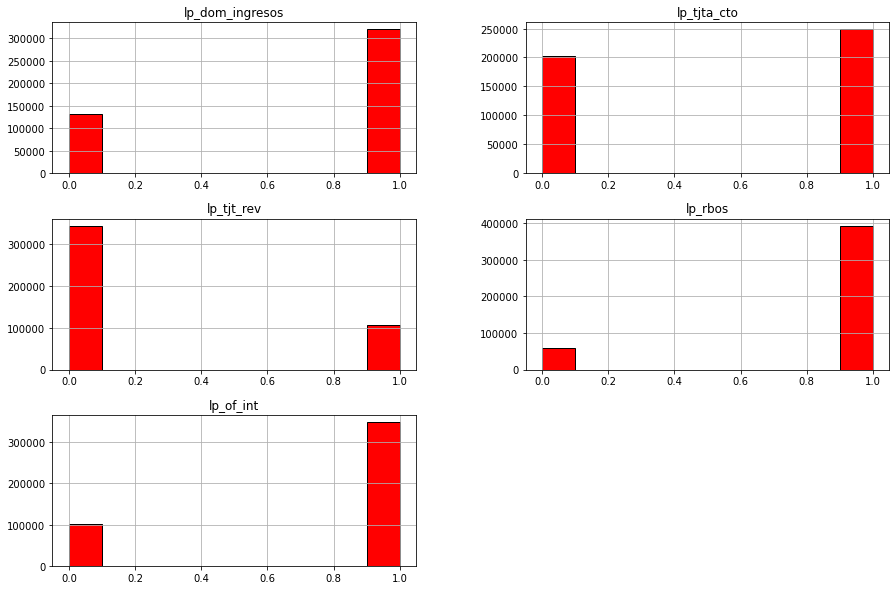

In [18]:
# Variables de servicio :'lp_dom_ingresos','lp_tjta_cto','lp_tjt_rev','lp_rbos','lp_of_int' 
# Se comprueba que en gral hay mas clientes que tienen el servicio de los que no.
variables_servicio.hist(figsize = (15,10), color = 'r', edgecolor = 'black',  linewidth=1);
#variables_servicio.describe()

In [19]:

print('INFORMACION VARIABLES SERVICIOS')
print('------------------------------------')
print ('% Clientes con Ingresos', df['lp_dom_ingresos'].value_counts(normalize = True)[1].round(2))
print('------------------------------------')
print ('% Clientes con Tjta Cto', df['lp_tjta_cto'].value_counts(normalize = True)[1].round(2))
print('------------------------------------')
print ('% Clientes con Tjta Rev', df['lp_tjt_rev'].value_counts(normalize = True)[1].round(2))
print('------------------------------------')
print ('% Clientes con Rbos domiciliados',df['lp_rbos'].value_counts(normalize = True)[1].round(2))
print('------------------------------------')
print ('% Clientes con Servicio Internet',df['lp_of_int'].value_counts(normalize = True)[1].round(2))
print('------------------------------------')


INFORMACION VARIABLES SERVICIOS
------------------------------------
% Clientes con Ingresos 0.71
------------------------------------
% Clientes con Tjta Cto 0.55
------------------------------------
% Clientes con Tjta Rev 0.24
------------------------------------
% Clientes con Rbos domiciliados 0.87
------------------------------------
% Clientes con Servicio Internet 0.77
------------------------------------


__Conclusiones.__

- Dentro de este bloque no vamos a eliminar ninguna variable para el estudio de nuestro modelo. Todas pueden ser relevantes.
- Unicamente sumaremos en una sola columna los clientes que tienen Tjta Credito y Tarjeta Revolving ya que amg¡bas tarjetas son de la misma naturaleza.


### Bloque 5 Variables de Seguros

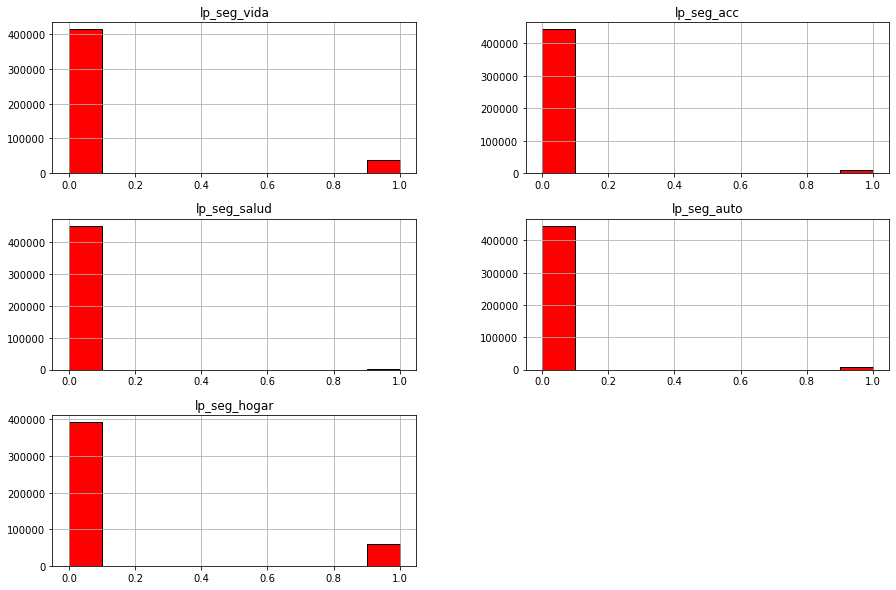

In [20]:
# Variables 'lp_seg_vida','lp_seg_acc','lp_seg_salud','lp_seg_auto','lp_seg_hogar'
# Entre estas variables se encuentra nuestro TARGET. Seguro de Hogar.
# Se comprueba como en general la mayoria de los clientes no tienen el seguro de referencia.
variables_seguros.hist(figsize = (15,10), color = 'r',edgecolor = 'black',  linewidth=1);
#variables_seguros.describe()

In [21]:

print('% Clientes con Seguro Vida',df['lp_seg_vida'].value_counts(normalize = True)[1].round(2))
print('------------------------------------')
print('% Clientes con Seguro Accidentes',df['lp_seg_acc'].value_counts(normalize = True)[1].round(2))
print('------------------------------------')
print('% Clientes con Seguro Salud',df['lp_seg_salud'].value_counts(normalize = True)[1].round(2))
print('------------------------------------')
print('% Clientes con Seguro Auto',df['lp_seg_auto'].value_counts(normalize = True)[1].round(2))
print('------------------------------------')
print('% Clientes con Seguro Hogar',df['lp_seg_hogar'].value_counts(normalize = True)[1].round(2), '--TARGET')
print('====================================')

% Clientes con Seguro Vida 0.08
------------------------------------
% Clientes con Seguro Accidentes 0.02
------------------------------------
% Clientes con Seguro Salud 0.0
------------------------------------
% Clientes con Seguro Auto 0.01
------------------------------------
% Clientes con Seguro Hogar 0.13 --TARGET


__Conclusiones.__

- En una primera visualizacion con histogramas vemos como la mayoria de los clientes no disponen de Seguros
- Se trata de una verdader oportunidad comercial ya que la realidad es que en cualquier casa o familia  lo normal es que haya uno o dos vehiculos, el/la cabeza de familiar disponga de un seguro de vida o se disponga a nivel familiar de un seguro de salud.  Este bajisimo porcentaje de tenecia de seguros indica que seguramente los tengan en otra entidad financiera o aseguradora.  Oportunidad comercial.
- De cara a nuestro modelo eliminamos el seguro de Salud por tener un 0% de tomadores. 


###  Bloque 6 Variables Segmentacion

In [22]:
# Informacion variables categoricas
print('INFORMACION VARIABLES CATEGORICAS')
print('------------------------------------')  
print(df['esta_carterizado'].value_counts(normalize = True))
print('------------------------------------')  
print(df['cliente_bbp'].value_counts(normalize = True))
print('------------------------------------')
print(df['tipo_gestor'].value_counts(normalize = True))
print('------------------------------------') 
print(df['cartera_patron'].value_counts(normalize = True))
print('------------------------------------')  
print(df['digital_3_meses'].value_counts(normalize = True))
print('------------------------------------')  
print(df['marca_bp'].value_counts(normalize = True))
print('------------------------------------')
print(df['camino_digital'].value_counts(normalize = True))
print('------------------------------------')
print(df['marca_ccte'].value_counts(normalize = True))
print('------------------------------------')
print(df['seg_valor'].value_counts(normalize = True))
print('------------------------------------') 
print(df['seg_recorrido'].value_counts(normalize = True))


INFORMACION VARIABLES CATEGORICAS
------------------------------------
SI    0.904416
NO    0.095584
Name: esta_carterizado, dtype: float64
------------------------------------
NO    1.0
Name: cliente_bbp, dtype: float64
------------------------------------
ASESOR FINANCIERO          0.894690
SIN GESTOR                 0.095584
SUBDIRECCIÓN DE OFICINA    0.009726
Name: tipo_gestor, dtype: float64
------------------------------------
ASESORAMIENTO FINANCIERO    0.697767
TUTELA                      0.206649
SIN CARTERA                 0.095584
Name: cartera_patron, dtype: float64
------------------------------------
SI    0.510096
NO    0.489904
Name: digital_3_meses, dtype: float64
------------------------------------
NO    0.720633
SI    0.279367
Name: marca_bp, dtype: float64
------------------------------------
SIN USO          0.430175
CONSULTIVO       0.264466
TRANSACCIONAL    0.215511
POCO USO         0.058242
COMPRADOR        0.031606
Name: camino_digital, dtype: float64
--------

__Conclusiones.__

- Variables Carterizado y BBP las eliminamos del modelo. Todos los clientes estan carterizados y ninguno en BBP
- Resto de variables mantenemos.


## 8)  Feature Importances

Una vez estudiadas las variables en bloques ,  de cara a ir pensando en el modelo de clasificacion buscaremos de forma grafica las posibles correlaciones que pueda haber entre las variables. 

In [23]:
df = df[['edad','saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp',
              'lp_dom_ingresos','lp_tjta_cto','lp_tjt_rev','lp_rbos','lp_of_int',
              'lp_seg_vida','lp_seg_acc','lp_seg_salud','lp_seg_auto','lp_seg_hogar']]

###  Correlaciones entre Variables

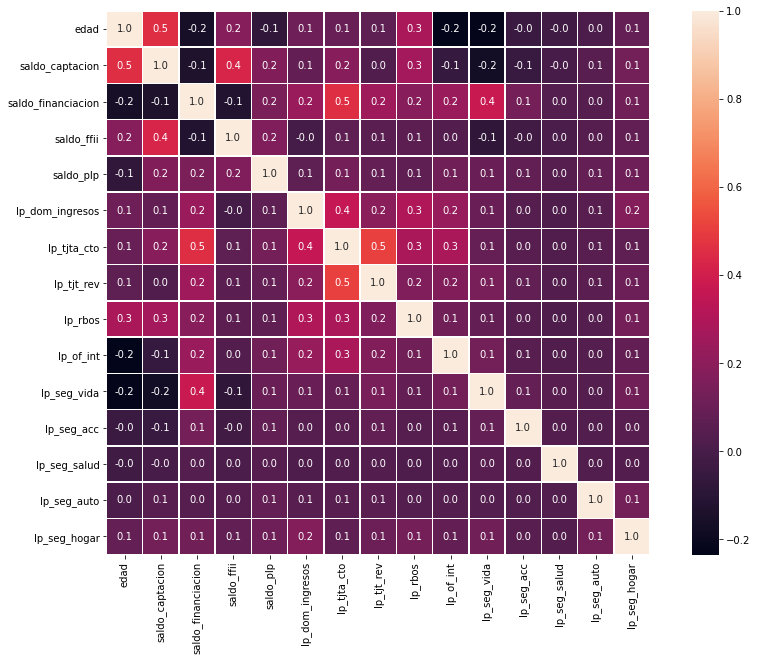

In [24]:
import seaborn as sns
correlation_mat = df.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(correlation_mat, annot = True, square = True, 
            linewidths=.5, fmt=".1f",annot_kws={'size':10},ax=ax)
plt.show()

### Correlaciones con SelectKBest & f_classif

In [25]:
seguro_hogar = df['lp_seg_hogar']

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
k = 10  # número de atributos a seleccionar
entrenar = df.drop(['lp_seg_hogar'], axis=1)
columnas = list(entrenar.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(entrenar, seguro_hogar)
atrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos

['edad',
 'saldo_captacion',
 'saldo_financiacion',
 'saldo_plp',
 'lp_dom_ingresos',
 'lp_tjt_rev',
 'lp_rbos',
 'lp_of_int',
 'lp_seg_vida',
 'lp_seg_auto']

__Conclusiones.__

- Utilizamos tabla de correlaciones con metodo spearman cuyo resultado arroja mayores correlaciones que los otros metodos
- La correlacion entre las variables es en general baja. Hay incluso correlaciones negativas pero tambien bajas
- Utilizaremos todas la variables

## 8) Preprocessing

Segun hemos concluido en nuestro estudio de la base de datos ( EDA ) hacemos unas modificaciones en las variables de edad, Financiacion, Planes de Pension y Fondos de Inversion

- Variable Edad. Eliminaremos a los clientes entre los rangos de edad 0-25 y 90 y superiores.
- Fondos de Inversion y Planes de Pension son convertidas en variables booleanas. Los valores asignados seran 0 si no tiene y 1 si tiene.  

Adcionalmente trabajamos con:

- Label Encoder - Convertir las variables categoricas en numero
- Outliers - Revision de posibles Ouliers
- Normalizacion - Llevar todas las variables a una escala comun
- PCA Posible simplificacion de variables reduciendo dimesionalidad a la base de datos

In [37]:
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/Financial-Product-Sales-Forecast-Model/0rigin_data/cleanned_data/df.tfm')

In [24]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

In [25]:
# Adaptamos el DF eliminado 2 varaibles categoricas segun conclusiones EDA. Esta carterizado y cliente BP
df = df[['cliente', 'saldo_captacion', 'tipo_gestor', 'gestor', 'cartera_patron', 
         'codigo_cartera','digital_3_meses', 'camino_digital', 'saldo_financiacion', 
         'saldo_ffii', 'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev',
         'lp_rbos','lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
         'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
         'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto']]
               

In [26]:
df.dtypes;

In [38]:
# Eliminamos clientes de 0 a 24 años y de mas de 90 años
inf25_sup90 = df[(df['edad'] < 25) | (df['edad'] > 90)].index
# Delete these row indexes from dataFrame
df.drop(inf25_sup90 , inplace=True)

In [39]:
df['edad'].describe()

count    417812.000000
mean         59.915787
std          16.207368
min          25.000000
25%          48.000000
50%          61.000000
75%          73.000000
max          90.000000
Name: edad, dtype: float64

In [40]:
# Transformamos variable Planes de Pension 0 No tiene 1 Si tiene
df['saldo_plp'] = df['saldo_plp'].apply(lambda x: 1 if x > 0 else 0)
pd.value_counts(df['saldo_plp'], normalize = True)

0    0.888785
1    0.111215
Name: saldo_plp, dtype: float64

In [41]:
# Transformamos variable Fondos de Inversion 0 No tiene 1 Si tiene
df['saldo_ffii'] = df['saldo_ffii'].apply(lambda x: 1 if x > 0 else 0)
pd.value_counts(df['saldo_ffii'], normalize = True)

0    0.859183
1    0.140817
Name: saldo_ffii, dtype: float64

In [42]:
# Trasnformamos variables que no vamos a utilizar a object
df[['cliente','gestor','codigo_cartera', 
    'dz','oficina']] = df[["cliente", "gestor",
                       'codigo_cartera', 'dz', 'oficina']].astype(object);

In [43]:
# Variable Captacion. 
Clientes_con_saldos_negativos = df[df['saldo_captacion'] < 0]['cliente'].nunique()
Porcentaje_Clientes_con_saldos_negativos = df[df['saldo_captacion'] < 0]['cliente'].nunique() / df['cliente'].count()
print ('Clientes_con_saldos_negativos :',Clientes_con_saldos_negativos)
print ('Porcentaje_Clientes_con_saldos_negativos: ',Porcentaje_Clientes_con_saldos_negativos)

Clientes_con_saldos_negativos : 8828
Porcentaje_Clientes_con_saldos_negativos:  0.021129120274190307


In [44]:
# No queremos los valores negativos. Les damos valor de cero.
df[df['saldo_captacion'] < 0] = 0

In [45]:
df['saldo_captacion'].describe()

count    4.178120e+05
mean     5.194882e+04
std      8.914284e+04
min      0.000000e+00
25%      2.189145e+03
50%      1.787874e+04
75%      6.811098e+04
max      5.290216e+06
Name: saldo_captacion, dtype: float64

## LABEL ENCODER

Dentro del Data Frame existen 10 variables categoricas las cuales tenemos que transformar a numero para poder utilizarlas en el modelo.

In [46]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

In [49]:
# Transformamos las variables
lbl.fit_transform(df['tipo_gestor'])
lbl.fit_transform(df['cartera_patron'])
lbl.fit_transform(df['digital_3_meses'])
lbl.fit_transform(df['camino_digital'])
lbl.fit_transform(df['marca_bp'])
lbl.fit_transform(df['marca_ccte'])
lbl.fit_transform(df['seg_valor'])
lbl.fit_transform(df['seg_recorrido'])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

In [46]:
# Asignamos a cada una de estas variables una nueva columna
df['tipo_gestor_etiqueta']=lbl.fit_transform(df['tipo_gestor'])
df['cartera_patron_etiqueta']=lbl.fit_transform(df['cartera_patron'])
df['digital_3_meses_etiqueta']=lbl.fit_transform(df['digital_3_meses'])
df['camino_digital_etiqueta']=lbl.fit_transform(df['camino_digital'])
df['marca_bp_etiqueta']=lbl.fit_transform(df['marca_bp'])
df['marca_ccte_etiqueta']=lbl.fit_transform(df['marca_ccte'])
df['seg_valor_etiqueta']=lbl.fit_transform(df['seg_valor'])
df['seg_recorrido_etiqueta']=lbl.fit_transform(df['seg_recorrido'])

In [47]:
# Confirmamos que la transformacion se ha realizado correctamente. 
df['tipo_gestor_etiqueta'].value_counts()

0    403840
1     43144
2      4390
Name: tipo_gestor_etiqueta, dtype: int64

In [48]:
# Eliminamos las antiguas variables categoricas que se han transformado y lo confirmamos listando las columnas.
df.drop(['tipo_gestor','cartera_patron','digital_3_meses','camino_digital',
         'marca_bp','marca_ccte','seg_valor','seg_recorrido'],axis = 1,inplace = True)

In [49]:
df.columns

Index(['cliente', 'saldo_captacion', 'gestor', 'codigo_cartera',
       'saldo_financiacion', 'saldo_ffii', 'saldo_plp', 'lp_dom_ingresos',
       'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos', 'lp_of_int', 'edad', 'dz',
       'oficina', 'lp_seg_vida', 'lp_seg_acc', 'lp_seg_salud', 'lp_seg_hogar',
       'lp_seg_auto', 'tipo_gestor_etiqueta', 'cartera_patron_etiqueta',
       'digital_3_meses_etiqueta', 'camino_digital_etiqueta',
       'marca_bp_etiqueta', 'marca_ccte_etiqueta', 'seg_valor_etiqueta',
       'seg_recorrido_etiqueta'],
      dtype='object')

# OUTLIERS

Hemos visto durante la exploracion del data set que existen distintas variables que son susceptibles de tener Outliers. Estas son 'edad','saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp'. 

- Variable Captacion. No tiene outliers. Son valores reales. Solamente modificamos los negativos y les damos valor 0 Euros.
- Fondos de inversion y planes de pension han sido transformadas a 0-1 "Tiene no Tiene.
- Financiacion es una variable que por su naturaleza no queremos modificar.

- __Variable edad__. Es la unica que puede tener ouliers reales.  Hemos eliminado previamente clientes entre 0-25 años y superiores a 90 años por lo que probablemente los Outlier esten ya trabajados. 

__Variable EDAD__

Hacemos la visualizacion con un histograma y un BoxPlot. Con este ultimo confirmamos que no tenemos Outliers

<AxesSubplot:>

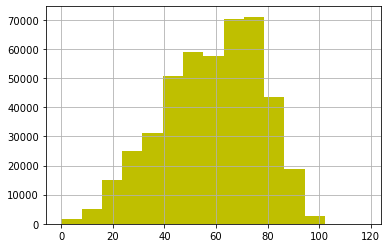

In [50]:
df['edad'].hist(color = 'y', bins = 15)

Boxplot edad


count    451374.000000
mean         58.268941
std          19.018368
min           0.000000
25%          45.000000
50%          60.000000
75%          73.000000
max         118.000000
Name: edad, dtype: float64

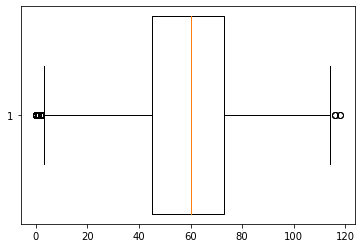

In [51]:
print ('Boxplot edad')
plt.boxplot(df['edad'],vert = False, widths = 2)
plt.show   
df['edad'].describe()

In [1]:
df.colums

NameError: name 'df' is not defined

## NORMALIZACION

Debemos llevar todas las varaibles a una escala comun. Para ello utilizamos MinMaxScaler.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df_normalizado = scaler.fit_transform(df)

In [ ]:
columnas_datos_numericos = df.columns

In [ ]:
df_normalizado = pd.DataFrame(df_normalizado, columns=columnas_datos_numericos)

In [ ]:
df_normalizado.head(3)

## PCA 

Despues de haber reducido el Data Frame quedandonos unicamente con las columnas necesarias para el estudio del modelo, aun asi tenemos 22 variables que vamos a intentar reducir utilizando PCA para reducir la dimensionalidad. Compararemos si la utilizacion del PCA mejora o no el resultado.


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
df_sin_target = df_normalizado.drop(['lp_seg_hogar'], axis = 1)

In [ ]:
#Instanciamos objeto PCA y aplicamos
pca = PCA(15) # n =  ponemos como numero de pcas 105
pca.fit(df_sin_target) # obtener los componentes principales
df_transforming = pca.transform(df_sin_target) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [ ]:
pca.components_[14]

In [ ]:
list(zip(df_sin_target.columns, df_transforming[0]))

In [ ]:
print("shape of X_pca", df_transforming.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:15]))
#Vemos que con los 15 componentes tenemos el 99% de varianza explicada

In [ ]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_), color = 'y')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show() 

In [ ]:
# Damos un nombre a cada columna del DF una vez realizado el PCA.
df_pca = pd.DataFrame (data = df_transforming, columns = ['1','2','3','4','5','6','7','8','9',
                                                          '10','11','12','13','14','15'
                                                          ])

In [ ]:
# Unimos nuestro Target al DF con PCA realizado.
finalDf = pd.concat ([df_pca, df_normalizado [['lp_seg_hogar']]], axis = 1)

In [ ]:
finalDf.columns

## __ESTUDIO DEL TARGET __Seguro_Hogar____

In [180]:
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/Financial-Product-Sales-Forecast-Model/0rigin_data/cleanned_data/df.tfm')

- Que estructura tiene el Target ?
- Como se relaciona con el resto de variables
- Son importantes todas las variables ?
- Podemos descartar alguna variable de cara al modelo ?

In [181]:
# Variable Binaria.  1 Tiene Seguro - 0 No tiene Seguro
df['lp_seg_hogar'].unique()

array([1, 0])

### Estructura de Target

0    0.869707
1    0.130293
Name: lp_seg_hogar, dtype: float64
% Clientes con Seguro Hogar 0.13 --TARGET


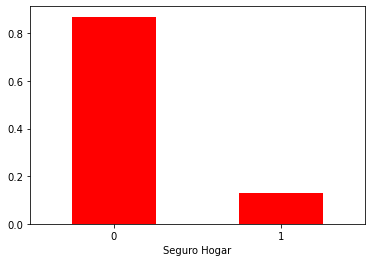

In [202]:
seguro_hogar = pd.value_counts(df['lp_seg_hogar'], sort = True, normalize = True)
print (seguro_hogar)

# Ploteamos el desbalanceo de la variable Target para una mejor visualizacion
# Vemos % y numero de clientes
seguro_hogar.plot(kind = 'bar', rot = 0, color = 'r')
print('% Clientes con Seguro Hogar',df['lp_seg_hogar'].value_counts(normalize = True)[1].round(2), '--TARGET')
plt.xlabel('Seguro Hogar')
plt.show()


dz
1     6824
2     5957
3     7233
4     4258
5     6524
6     5334
7     4614
8     2274
9     3527
10    6176
11    6090
Name: lp_seg_hogar, dtype: int64


<AxesSubplot:xlabel='dz'>

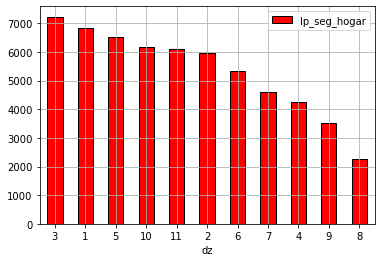

In [194]:
# Numero de clientes con Seguro de Hogar por DZ
print(df.groupby('dz')['lp_seg_hogar'].sum())
Seguros_de_hogar_por_DZ = df.groupby('dz')['lp_seg_hogar'].sum().sort_values(ascending = False)
Seguros_de_hogar_por_DZ.plot(kind ='bar',
                             legend = 'Reverse',
                             grid = True,color = 'r',
                             rot = 0,
                             edgecolor = 'black',
                             linewidth=1)

<AxesSubplot:xlabel='edad'>

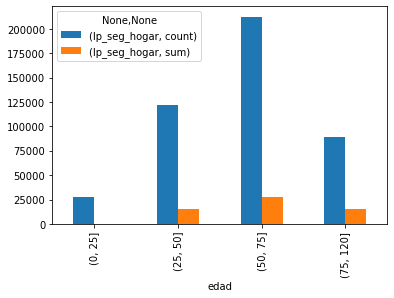

In [67]:
# Clientes con Seguro de Hogar segun las edades
# Count refleja el Numero total de clientes en el segmento edad
# Sum refleja Numero de clientes con Seguro de Hogar
segmentacion_por_edad = pd.cut(df['edad'], bins=(0, 25, 50, 75, 120))
df.groupby(segmentacion_por_edad)[['lp_seg_hogar']].agg(['count','sum']).plot(kind = 'bar')

tipo_gestor              lp_seg_hogar
ASESOR FINANCIERO        0               349347
                         1                54493
SIN GESTOR               0                39209
                         1                 3935
SUBDIRECCIÓN DE OFICINA  0                 4007
                         1                  383
Name: lp_seg_hogar, dtype: int64


<AxesSubplot:xlabel='tipo_gestor,lp_seg_hogar'>

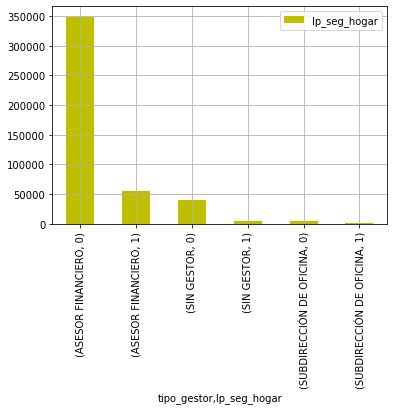

In [36]:
# Distribucion seguros de hogar por tipo de gestor
print(df.groupby('tipo_gestor')['lp_seg_hogar'].value_counts())
df.groupby('tipo_gestor')['lp_seg_hogar'].value_counts().plot(kind ='bar',legend = 'Reverse', grid = True, color = 'y')

lp_dom_ingresos  lp_seg_hogar
0                0               127275
                 1                 4921
1                0               265288
                 1                53890
Name: lp_seg_hogar, dtype: int64


<AxesSubplot:xlabel='lp_dom_ingresos,lp_seg_hogar'>

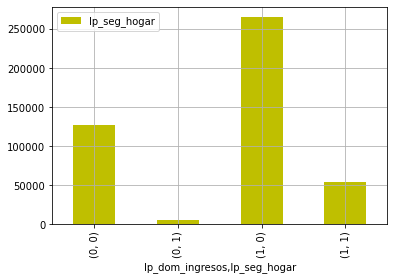

In [39]:
# Distribucion seguros de hogar por ingresos
print(df.groupby('lp_dom_ingresos')['lp_seg_hogar'].value_counts())
df.groupby('lp_dom_ingresos')['lp_seg_hogar'].value_counts().plot(kind ='bar',legend = 'Reverse', grid = True, color = 'y')